In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
file_path = r"C:\Users\kazit\Downloads\PROJECT_REPORT_WTD_7.31_-_8.6.xlsx"


sheet_name = "CALLS"  # read frist sheet

df = pd.read_excel(file_path, sheet_name=sheet_name)
df.head(10)

,CALL ID,TIMESTAMP,CAMPAIGN,CALL TYPE,AGENT,AGENT NAME,DISPOSITION,DNIS,ANI,RING TIME,TALK TIME,Column1,HOLD TIME,PARK TIME,AFTER CALL WORK TIME,TRANSFERS,SKILL
0,300000069666396,"Mon, 31 Jul 2023 08:01:10",eb_c2c,Inbound,eb.us-patriciatiernan,Patricia Tiernan,NaN,1.970441e+10,12672497346,00:00:01,00:01:58,True,00:00:20,00:00:00,NaN,1.0,Closers - Auto and Home
1,300000069666407,"Mon, 31 Jul 2023 08:03:01",eb_so,Inbound,eb.us-amandamahone,Amanda Mahone,NaN,1.800957e+10,14122454681,00:00:01,00:00:36,True,00:00:00,00:00:00,NaN,1.0,Closers - Auto
2,300000069666424,"Mon, 31 Jul 2023 08:05:17",eb_ho,Inbound,eb.us-amandamahone,Amanda Mahone,Not Interested,1.800893e+10,19563427936,00:00:01,00:14:08,True,00:00:00,00:00:00,00:00:13,NaN,Closers - Auto
3,300000069666430,"Mon, 31 Jul 2023 08:06:14",eb_web,Inbound,eb.us-kimberlymontgomery,Kimberly Montgomery,NaN,1.800895e+10,15862643650,00:00:01,00:00:28,True,00:00:00,00:00:00,NaN,1.0,Closers - Auto
4,300000069666438,"Mon, 31 Jul 2023 08:06:20",eb_web,Inbound,eb.us-kevinsavala,Kevin Savala,Hung Up collecting info,1.800895e+10,19135796251,00:00:02,00:15:33,True,00:00:00,00:00:00,00:00:31,NaN,Closers - Auto
5,300000069666474,"Mon, 31 Jul 2023 08:09:31",eb_hit,Inbound,eb.us-kimberlymontgomery,Kimberly Montgomery,Sale,1.800215e+10,18163721760,00:00:01,00:20:39,True,00:00:00,00:00:00,00:00:36,NaN,Closers - Auto
6,300000069666489,"Mon, 31 Jul 2023 08:10:12",eb_so,Inbound,eb.us-patriciatiernan,Patricia Tiernan,No Coverage Available,1.800925e+10,19169408128,00:00:01,00:01:32,True,00:00:00,00:00:00,00:00:15,NaN,Closers - Auto
7,300000069666402,"Mon, 31 Jul 2023 08:10:16",_Transfer_Home_Closer,Queue Callback,eb.us-ratoriusthomas,Ratorius Thomas,Sale,1.706527e+10,18667047276,00:00:00,00:09:03,True,00:00:00,00:00:00,00:00:38,NaN,Closer Outbound - Home
8,300000069666561,"Mon, 31 Jul 2023 08:11:04",eb_hit,Inbound,eb.us-windehayden,Winde Hayden,Sale,1.888587e+10,12245955727,00:00:02,00:21:33,True,00:00:00,00:00:00,00:00:00,NaN,Closers - Auto
9,300000069666504,"Mon, 31 Jul 2023 08:12:05",_Transfer_Auto_Closer,Inbound,eb.us-patriciatiernan,Patricia Tiernan,Scheduled Callback,1.202984e+10,12029104323,00:00:02,00:10:19,True,00:00:00,00:00:00,00:00:16,NaN,Closer Outbound - Auto


## DataSet Cleaning

In [35]:
df.columns

Index(['CALL ID', 'TIMESTAMP', 'CAMPAIGN', 'CALL TYPE', 'AGENT', 'AGENT NAME',
       'DISPOSITION', 'DNIS', 'ANI', 'RING TIME', 'TALK TIME', 'Column1',
       'HOLD TIME', 'PARK TIME', 'AFTER CALL WORK TIME', 'TRANSFERS', 'SKILL'],
      dtype='object')

In [36]:
df.dtypes

CALL ID                   int64
TIMESTAMP                object
CAMPAIGN                 object
CALL TYPE                object
AGENT                    object
AGENT NAME               object
DISPOSITION              object
DNIS                    float64
ANI                      object
RING TIME                object
TALK TIME                object
Column1                    bool
HOLD TIME                object
PARK TIME                object
AFTER CALL WORK TIME     object
TRANSFERS               float64
SKILL                    object
dtype: object

In [37]:
df.isnull().sum()

CALL ID                     0
TIMESTAMP                   0
CAMPAIGN                    0
CALL TYPE                   0
AGENT                       0
AGENT NAME                  0
DISPOSITION               584
DNIS                       85
ANI                        85
RING TIME                   0
TALK TIME                   0
Column1                     0
HOLD TIME                  35
PARK TIME                  35
AFTER CALL WORK TIME      584
TRANSFERS               12390
SKILL                       0
dtype: int64

In [38]:
# drop_null_value
drop_null_value = ['DISPOSITION', 'DNIS', 'ANI', 'HOLD TIME', 'PARK TIME', 'AFTER CALL WORK TIME']

df = df.dropna(subset=drop_null_value)

In [39]:
#Fill null values in 'TRANSFERS' column with False & '1' encoding True
df['TRANSFERS'] = df['TRANSFERS'].replace(True, 1)
df['TRANSFERS'].fillna(False, inplace=True)

In [40]:
df.isnull().sum() #chek aging

CALL ID                 0
TIMESTAMP               0
CAMPAIGN                0
CALL TYPE               0
AGENT                   0
AGENT NAME              0
DISPOSITION             0
DNIS                    0
ANI                     0
RING TIME               0
TALK TIME               0
Column1                 0
HOLD TIME               0
PARK TIME               0
AFTER CALL WORK TIME    0
TRANSFERS               0
SKILL                   0
dtype: int64

### Conversion rate of sales reps all calls and calls that last over 10 seconds.

In [41]:


# Convert 'TALK TIME' column to timedelta
df['TALK TIME'] = pd.to_timedelta(df['TALK TIME'].apply(str))

df['TALK TIME'] = df['TALK TIME'].dt.total_seconds()

filtered_df = df[(df['TALK TIME'] > 10)]

# Calculate total number of calls
total_calls = len(filtered_df)

if total_calls == 0: #chek have data
    print("No calls meet the criteria.")
else:
 
    successful_sales = len(filtered_df[filtered_df['DISPOSITION'] == 'Sale'])

    # Calculate conversion rate
    conversion_rate = (successful_sales / total_calls) * 100

    print("Total Calls:", total_calls)
    print("Successful Sales:", successful_sales)
    print("Conversion Rate:", conversion_rate, "%")


Total Calls: 10778
Successful Sales: 817
Conversion Rate: 7.580256077194285 %


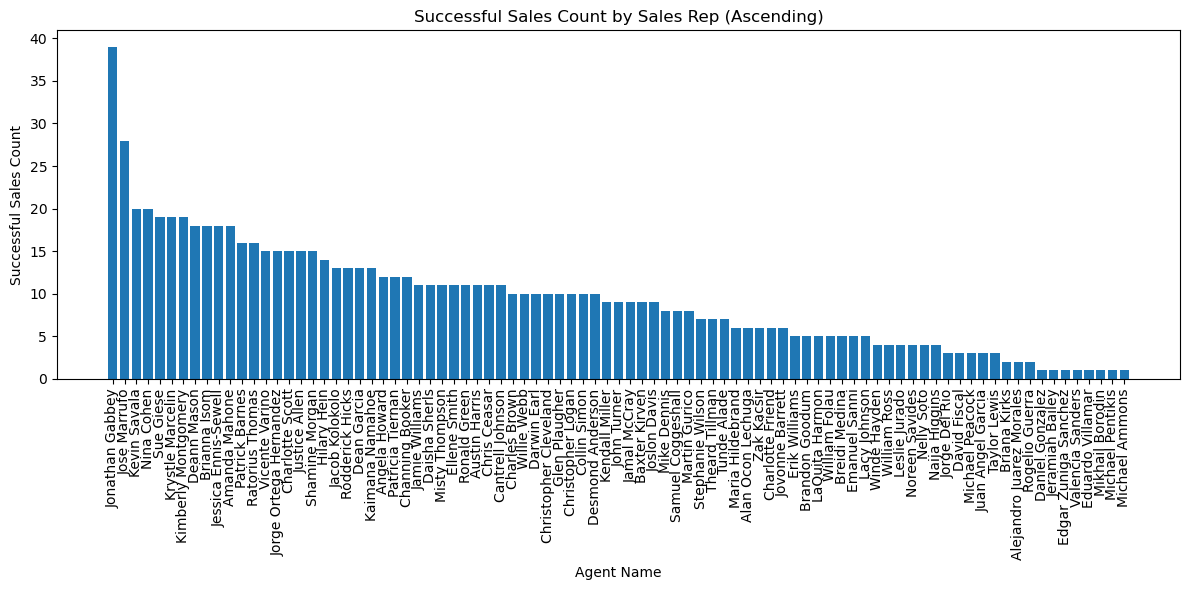

In [42]:

# Group the data by 'AGENT NAME' and count successful sales
agent_sales_counts = df[df['DISPOSITION'] == 'Sale'].groupby('AGENT NAME').size()


sorted_agent_sales_counts = agent_sales_counts.sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_agent_sales_counts.index, sorted_agent_sales_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Agent Name')
plt.ylabel('Successful Sales Count')
plt.title('Successful Sales Count by Sales Rep (Ascending)')
plt.tight_layout()
plt.show()


In [43]:
#Top ten Agent

T10=sorted_agent_sales_counts[:11]
T10

AGENT NAME
Jonathan Gabbey         39
Jose Marrufo            28
Kevin Savala            20
Nina Cohen              20
Sue Giese               19
Krystle Marcelin        19
Kimberly Montgomery     19
Deann Mason             18
Brianna Isom            18
Jessica Ennis-Sewell    18
Amanda Mahone           18
dtype: int64

In [44]:
#last_ten Agent
L10=sorted_agent_sales_counts[-11:]
L10

AGENT NAME
Briana Kirks                2
Alejandro Juarez Morales    2
Rogelio Guerra              2
Daniel Gonzalez             1
Jeramiah Bailey             1
Edgar Zuniga Sanchez        1
Valencia Sanders            1
Eduardo Villamar            1
Mikhail Borodin             1
Michael Pentikis            1
Michael Ammons              1
dtype: int64

### What Is the conversion of each type of transfer? (10 sec vs deals)



There is no description of the calls that have been transferred in the call transfer column,
so the rows of that description have been dropped. Therefore, the transfer call data set is now missing.
But I have analyzed the transfer calls have call type inbound and outbound and in the skill column they have 
Closer Outbound - Auto or Closer Auto.


### Talk time for each agent

In [45]:

# Calculate talk time for each agent
talk_time_per_agent = df.groupby('AGENT NAME')['TALK TIME'].sum()
talk_time_per_agent = talk_time_per_agent.sort_values(ascending=False)
print(talk_time_per_agent)

AGENT NAME
Jonathan Gabbey      116202.0
Misty Thompson       110218.0
Krystle Marcelin     108302.0
Channing Booker      104144.0
Darwin Earl           99575.0
                       ...   
Michael Pentikis      12796.0
Briana Kirks          10814.0
Victoria Cowans        9802.0
Stephanie Starkey      8290.0
Jose Garcia             198.0
Name: TALK TIME, Length: 93, dtype: float64


In [46]:
#Top ten Agent
top10= talk_time_per_agent[:11]
top10

AGENT NAME
Jonathan Gabbey     116202.0
Misty Thompson      110218.0
Krystle Marcelin    108302.0
Channing Booker     104144.0
Darwin Earl          99575.0
Charlotte Scott      99207.0
Kaimana Namahoe      99113.0
Cantrell Johnson     97936.0
Amanda Mahone        94992.0
Kevin Savala         89332.0
Deann Mason          89266.0
Name: TALK TIME, dtype: float64

In [47]:
#last_ten Agent
last10= talk_time_per_agent[-11:]
last10

AGENT NAME
Mikhail Borodin      25121.0
Erik Williams        24435.0
Jeramiah Bailey      17227.0
Frank Asbury         16957.0
Daniel Gonzalez      16309.0
Valencia Sanders     14143.0
Michael Pentikis     12796.0
Briana Kirks         10814.0
Victoria Cowans       9802.0
Stephanie Starkey     8290.0
Jose Garcia            198.0
Name: TALK TIME, dtype: float64

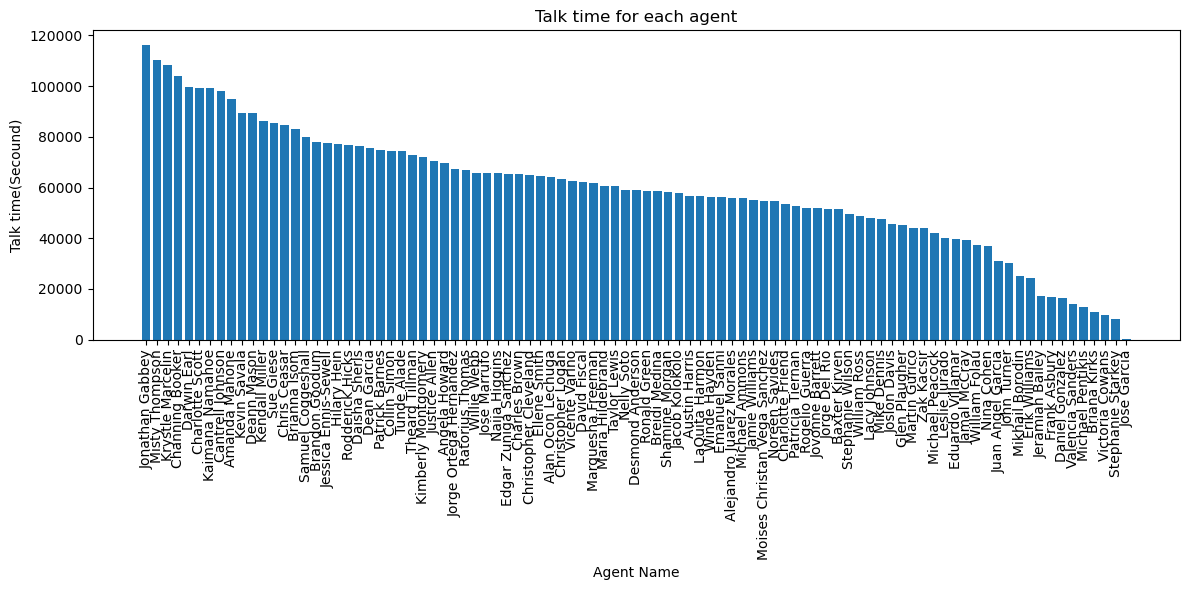

In [48]:
# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(talk_time_per_agent.index, talk_time_per_agent.values)
plt.xticks(rotation=90)
plt.xlabel('Agent Name')
plt.ylabel('Talk time(Secound)')
plt.title('Talk time for each agent')
plt.tight_layout()
plt.show()

In [49]:
file_path =  r"C:\Users\kazit\Downloads\PROJECT_REPORT_WTD_7.31_-_8.6.xlsx"


sheet_name = "SALES "  # read SALES sheet

sal = pd.read_excel(file_path, sheet_name=sheet_name)

In [50]:
sal.head(50)

,List ID,Policy,Agent Code,Screener,Disposition,Contract Number,Order #,WP,Phone,Status,Product,Grand Total,Alternate Phone,Third Agent Code,Unnamed: 14,Unnamed: 15
0,DAD BATCH 77,Monthly Plan,3358.0,eb.mex-yurenrafaelquineterovasquez,POST-DATE SALE COMPLETE,NaN,100062984,2023-08-04,(817) 630-5683,Active,Technology,23.95,NaN,NaN,NaN,NaN
1,EB_SO,Monthly Plan,3277.0,NaN,SALE COMPLETE,NaN,100063293,2023-08-05,(813) 376-8177,Active,Smartphones,9.41,NaN,'+18136501930,NaN,NaN
2,EB_SO,Monthly Plan,3397.0,NaN,SALE COMPLETE,NaN,100063282,2023-08-05,(918) 271-2256,Active,Smartphones,9.28,NaN,'+18009252862,NaN,NaN
3,EB_SO,Monthly Plan,3277.0,NaN,SALE COMPLETE,NaN,100063280,2023-08-05,(202) 631-7710,Active,Smartphones,9.24,NaN,'+18003808503,NaN,NaN
4,EB_HIT,Monthly Plan,3277.0,NaN,SALE COMPLETE,NaN,100063272,2023-08-05,(859) 245-4626,Active,Smartphones,9.41,NaN,'+18003744456,NaN,NaN
5,NaN,Monthly Plan,2022.0,scardoza@everythingbreaks.com,POST-DATE SALE COMPLETE,NaN,100063258,2023-08-05,(414) 213-8507,Active,Smartphones,9.32,NaN,NaN,NaN,NaN
6,EB_C2C,Monthly Plan,3366.0,NaN,SALE COMPLETE,NaN,100063239,2023-08-04,(202) 729-0060,Active,Smartphones,9.39,NaN,'+19704405110,NaN,NaN
7,DAD BATCH 78,Monthly Plan,3082.0,eb.mex-davidalvarezrivera,SALE COMPLETE,NaN,100063229,2023-08-04,(405) 762-3422,Active,Smartphones,9.28,NaN,NaN,NaN,NaN
8,EB_SO-R,Monthly Plan,3277.0,eb.mex-edgarmojica,SALE COMPLETE,NaN,100063223,2023-08-04,(252) 214-4884,Active,Smartphones,9.39,NaN,NaN,NaN,NaN
9,EB_WEB-R,Monthly Plan,3366.0,eb.mex-marlonnavarrete,SALE COMPLETE,NaN,100063220,2023-08-04,(262) 278-9117,Active,Smartphones,9.32,NaN,NaN,NaN,NaN


In [51]:
sal.isnull().sum()

List ID               14
Policy                 0
Agent Code             5
Screener             464
Disposition            0
Contract Number      142
Order #                0
WP                     0
Phone                  0
Status                 0
Product                0
Grand Total            0
Alternate Phone     1223
Third Agent Code     928
Unnamed: 14         1365
Unnamed: 15         1364
dtype: int64

In [52]:
sal.columns

Index(['List ID', 'Policy', 'Agent Code', 'Screener', 'Disposition',
       'Contract Number', 'Order #', 'WP', 'Phone', 'Status', 'Product',
       'Grand Total', 'Alternate Phone', 'Third Agent Code', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

In [53]:
sal.drop(['Unnamed: 14','Unnamed: 15'], axis=1, inplace=True) #drop some coloumns


In [54]:
sal.columns

Index(['List ID', 'Policy', 'Agent Code', 'Screener', 'Disposition',
       'Contract Number', 'Order #', 'WP', 'Phone', 'Status', 'Product',
       'Grand Total', 'Alternate Phone', 'Third Agent Code'],
      dtype='object')

In [55]:
# Drop rows with null values in specified columns
drop_null_value = ['Agent Code']


sal = sal.dropna(subset=drop_null_value)

Agent Code
3435.0    184.173333
2466.0    148.876429
3194.0    137.060000
3425.0    124.426250
3083.0    114.106667
             ...    
3378.0     31.970000
1.0        31.750000
3380.0     31.710000
3341.0     31.670000
3441.0     31.080000
Name: Grand Total, Length: 101, dtype: float64


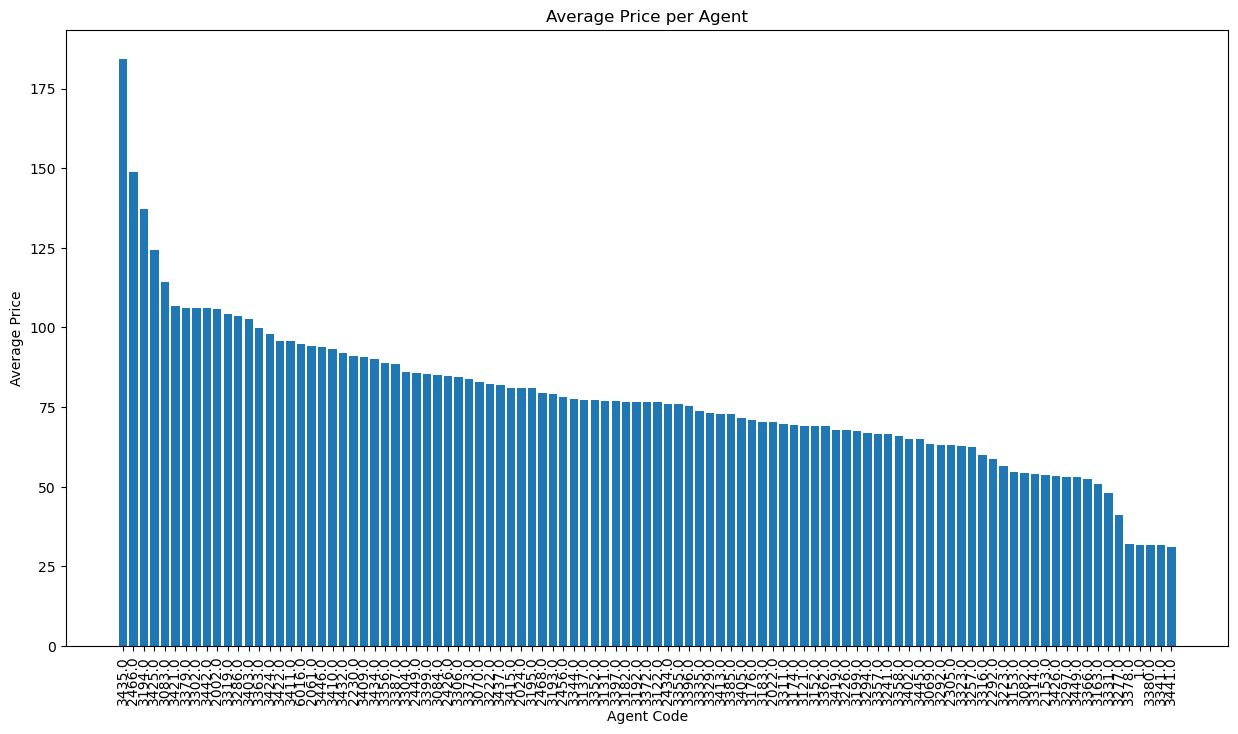

In [56]:
avg_price_per_agent = sal.groupby('Agent Code')['Grand Total'].mean()

x_values = range(len(avg_price_per_agent))
avg_price_per_agent = avg_price_per_agent.sort_values(ascending=False)
print(avg_price_per_agent)

# Create a bar chart
plt.figure(figsize=(15, 8))
plt.bar(x_values, avg_price_per_agent.values)
plt.xticks(x_values, avg_price_per_agent.index)  # Use Agent Codes as tick labels
plt.xlabel('Agent Code')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.title('Average Price per Agent')
plt.show()

In [57]:
#Top ten Agent
top_ten = avg_price_per_agent.iloc[:10]
print(top_ten)


Agent Code
3435.0    184.173333
2466.0    148.876429
3194.0    137.060000
3425.0    124.426250
3083.0    114.106667
3421.0    106.870000
3379.0    106.120000
3302.0    106.120000
3442.0    105.995000
2002.0    105.870000
Name: Grand Total, dtype: float64


In [58]:
#last_ten Agent
last_ten = avg_price_per_agent.iloc[-11:]
print(last_ten)

Agent Code
3297.0    53.027333
3449.0    52.925000
3366.0    52.320769
3163.0    50.920000
3331.0    47.963023
3277.0    41.230714
3378.0    31.970000
1.0       31.750000
3380.0    31.710000
3341.0    31.670000
3441.0    31.080000
Name: Grand Total, dtype: float64
